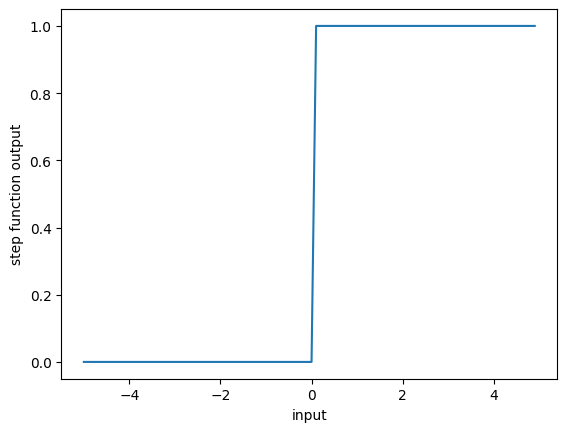

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation function
unit_step = lambda x: 0 if x < 0 else 1

# Vectorize the function (use on an array)
unit_step_v = np.vectorize(unit_step)

# Create arrays to plot
x = np.arange(-5, 5, 0.1)
y = unit_step_v(x)

# Plot
plt.plot(x, y)
plt.xlabel('input'); plt.ylabel('step function output')

plt.show()

In [2]:
# Data ('OR' gate)
# tuple format: ([x1, x2, bias], expected)
training_data = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 1),
    (np.array([1,0,1]), 1),
    (np.array([1,1,1]), 1),
]

In [3]:
# Perceptron code follows the example here, with
# some modifications:
# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/

# Imports
#for random input selection
from random import choice

# Weights (begin with random weights)
w = np.random.rand(3)

# Errors (store for plotting)
errors = []

# Learning rate (the size of "jumps" when updating the weights)
learn_rate = 0.2

# Number of iterations/weight updates
n = 50

# "Learning" loop
for i in range(n):

    # Select a random item from the training data
    x, expected = choice(training_data)

    # Neuron calculation (dot product of weights and input)
    result = np.dot(w, x)

    # Compare to the expected result
    error = expected - unit_step(result)
    errors.append(error)

    # Update the weights
    w += learn_rate * error * x

# Test the perceptron with the "learned" weights
for x, _ in training_data:
    result = np.dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result)))

[0 0]: -0.017183602829604572 -> 0
[0 1]: 0.9589907198097647 -> 1
[1 0]: 0.07495110929839383 -> 1
[1 1]: 1.0511254319377632 -> 1


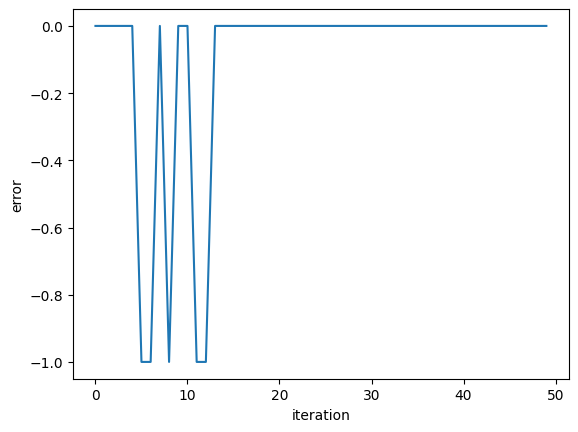

In [4]:
# Imports
import matplotlib.pyplot as plt

# Plot error as a function of iteration
iteration = np.arange(0, n, 1)
plt.plot(iteration, errors)
plt.xlabel('iteration'); plt.ylabel('error')

plt.show()

In [5]:
# Imports
import pandas as pd

# Create the OR operator
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [0,1,1,1]
       }

df = pd.DataFrame.from_dict(data).astype('int')
display(df.head())

# Separate feature and target
X = df[['x1', 'x2']].values
y = df['y'].values

,x1,x2,y
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,1


In [6]:
# Import Keras classes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Perceptron model
model = Sequential()
model.add(Dense(1,input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X,y, epochs=10);

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step - accuracy: 1.0000 - loss: 0.3130
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.7500 - loss: 0.3129
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7500 - loss: 0.3127
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7500 - loss: 0.3126
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7500 - loss: 0.3124
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7500 - loss: 0.3123
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7500 - loss: 0.3122
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.3120
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.3119
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.3117


In [7]:
# Evaluate the model
print('Model accuracy: ', model.evaluate(X, y)[1]*100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 1.0000 - loss: 0.3116
Model accuracy:  100.0


In [15]:
# Load the Pima Indians diabetes dataset
import numpy as np

# Set the URL for the data location
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

# Load the dataset
dataset = np.loadtxt(url, delimiter=',')

# Split into input (X) and output (y) variables
# (8 input columns, 1 target column)
X = dataset[:,0:8] # [rows, columns]
y = dataset[:,8]

In [16]:
# Define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Fit the keras model on the dataset
# (remove the verbose=0 argument to see the output)
model.fit(X, y, epochs=100, batch_size=10, verbose=0);

In [19]:
# Evaluate the model
print('Model accuracy: ', model.evaluate(X, y)[1]*100)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6873 - loss: 0.5281  
Model accuracy:  71.22395634651184
